In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### **PHASE 2. EXPLORATORY DATA ANALYSIS**

In [3]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable .

df = pd.read_csv("easy_visa_data.csv")

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### **Univariate Analysis**

##### **Numerical features**

In [5]:
# Checking the number of numerical features present
num_col =df.select_dtypes(['float64', 'int64']).columns
print(num_col)

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


In [6]:
# Checking all the features (categorical and numerical variables)
cat_col = df.select_dtypes('object').columns

# Printing the number of counts of each column
for col in cat_col:
    print(df[col].value_counts())
    print("-" *50)

case_id
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
EZYV05       1
            ..
EZYV25476    1
EZYV25477    1
EZYV25478    1
EZYV25479    1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [7]:
def histogram_boxplot(df, feature, figsize=(15,10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

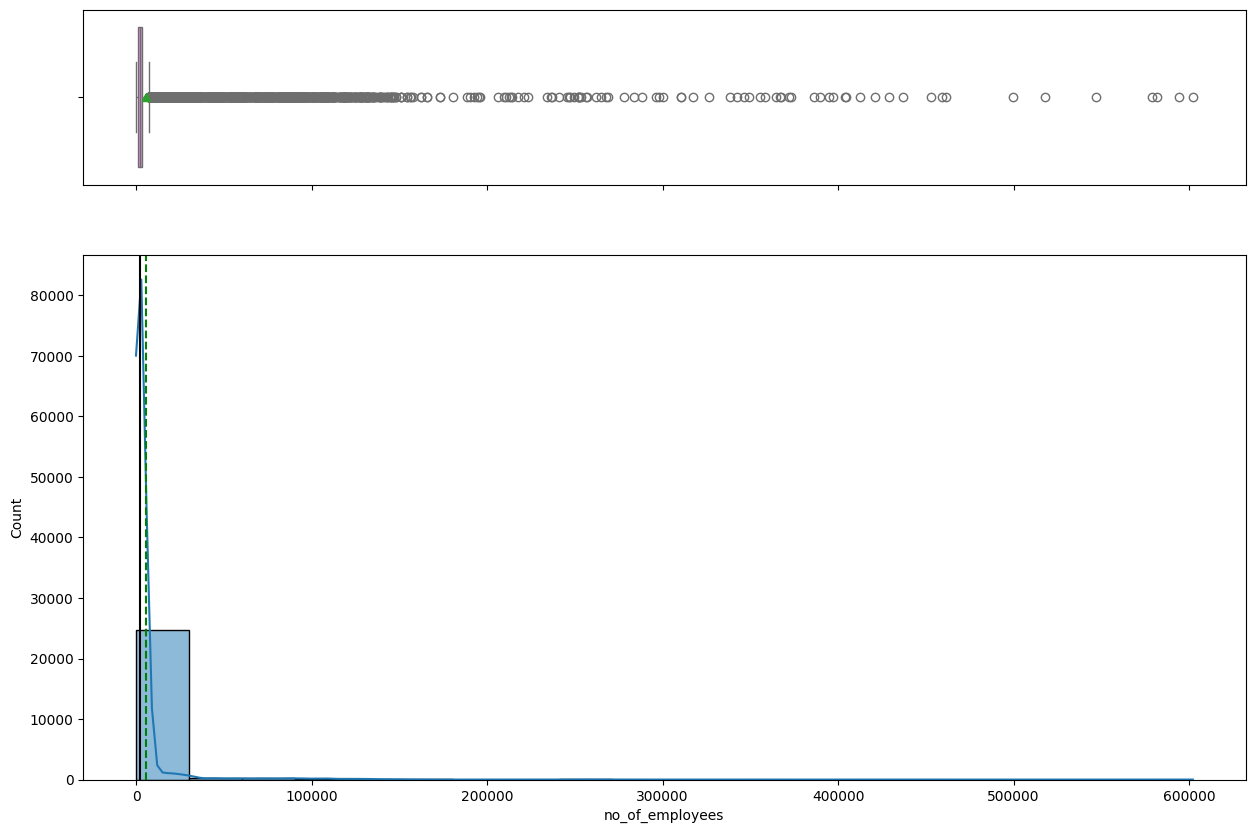

In [8]:
histogram_boxplot(df, 'no_of_employees', kde=True, bins=20)

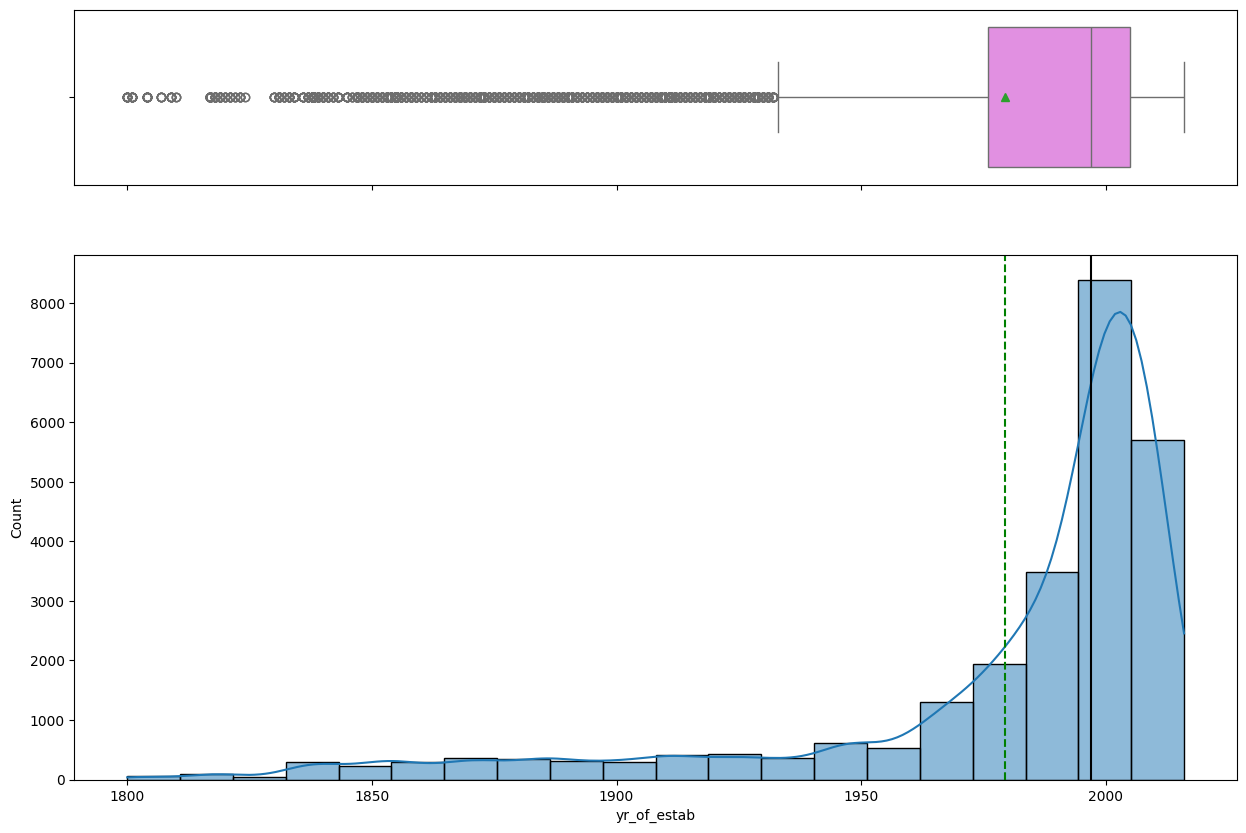

In [9]:
histogram_boxplot(df, 'yr_of_estab', kde=True, bins=20)

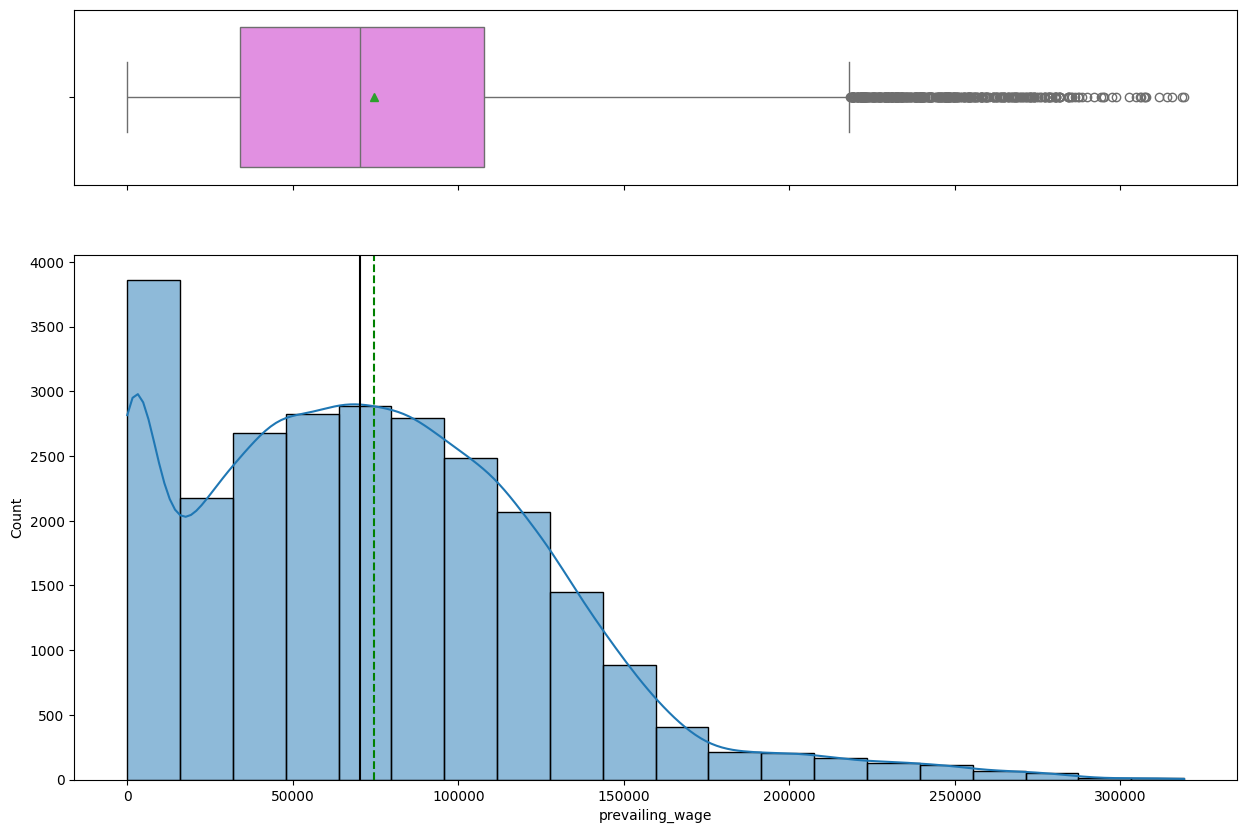

In [10]:
histogram_boxplot(df, 'prevailing_wage', kde=True, bins=20)

## Insights from Histogram and Boxplot Visualizations:

1. Number of Employees:

* Distribution: The number of employees is right_skewed, meaning there are companies with very large number of employees as against some with low employees.

* Outliers: The skewness indicates there is presence of outliers in the data.

* Action: Apply log transformation to normalize the skewness, if it doesn't work, try using RobustScaler or SMOTE to balance out the class.


2. Year establishment:

* Distribution: We can see that it left_skewed(positively_skewed), meaning that there is an increase in the year of establishment from the year 1970 to early 2000s.

* Outliers: This indicates that some of the companies were established earlier than 1970.

* Action: Cap the outliers to be within a range. We don't need to remove them beacause these companies are still functional.

3. Prevailing Wage:

* Distribution: We have a large number of employees earning below 20,000. Majority of the people earn between 30,000 to 150,000 while a few number of people earn above 150,000.

* Outliers: Presence of outlies in the dataset indicates that some people earn above 200,000.

* Action: Use log transformation to make the data more balanced. Also use robust scaler to make sure the outliers are within a particular range.


#### **Categorical features**

In [11]:
categorical_columns = df.select_dtypes(include='object').columns

In [12]:
def univariate_categorical_analysis(df, col):
    # Frequency and percentage
    distribution = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Counts': distribution, 'Percentage (%)': percentage.round(2)})
    
    print(f"--- {col} Distribution ---\n")
    print(summary)
    print("\n")

    # Set up the figure
    plt.figure(figsize=(12, 5))

    # Bar chart
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)
    plt.title(f"Distribution (Bar Chart) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2", len(distribution))
    )
    plt.title(f"Distribution (Pie Chart) of {col}", fontsize=13)
    plt.ylabel("")  # Remove y-label for better layout

    plt.tight_layout()
    plt.show()



--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


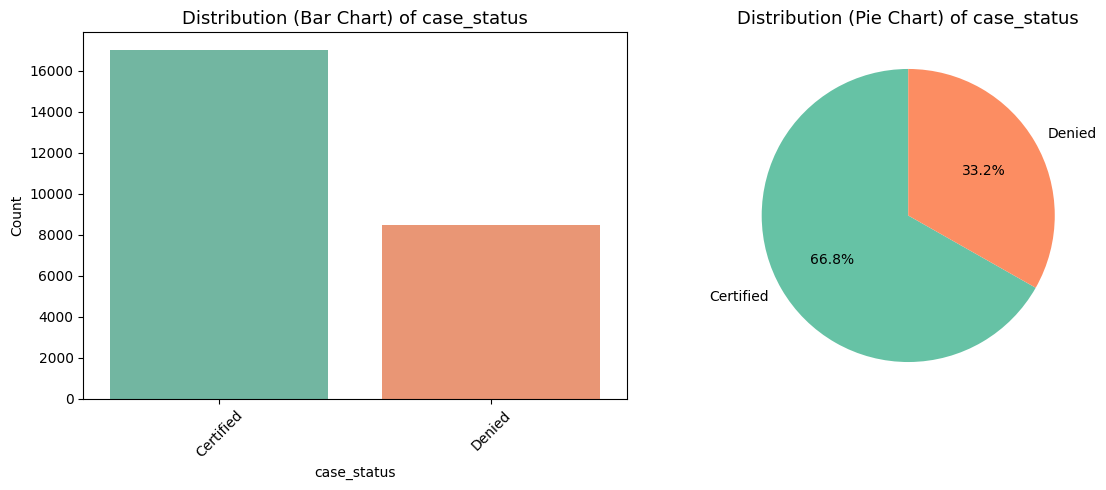

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


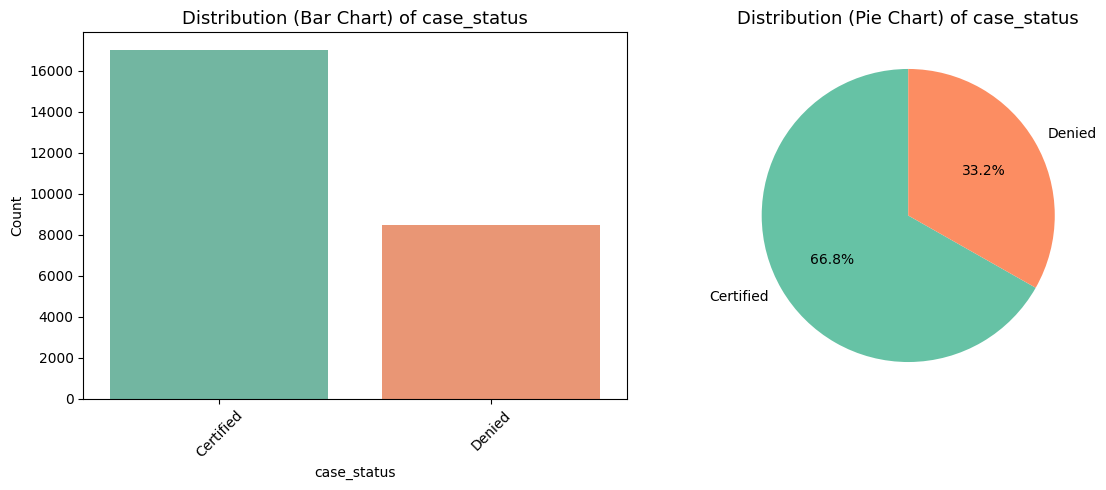

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


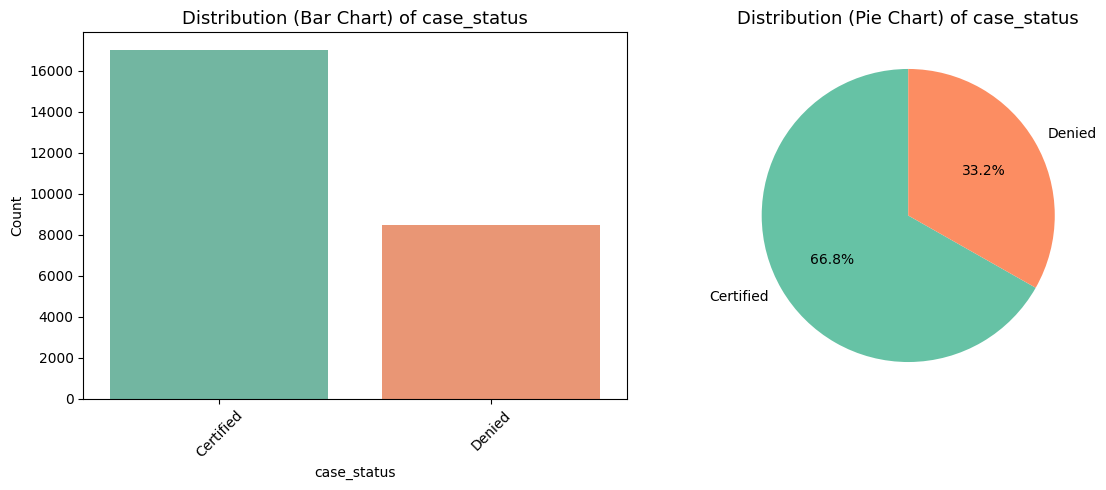

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


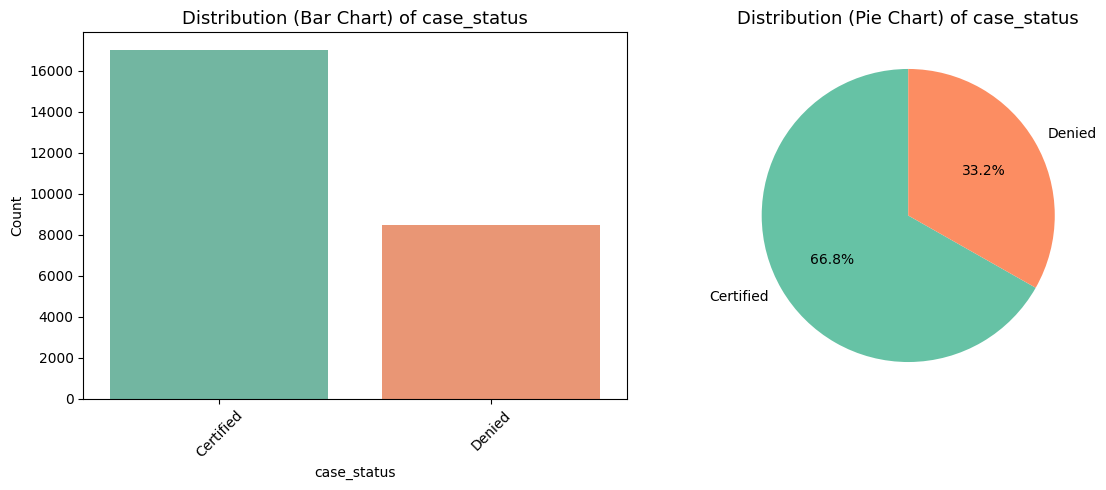

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


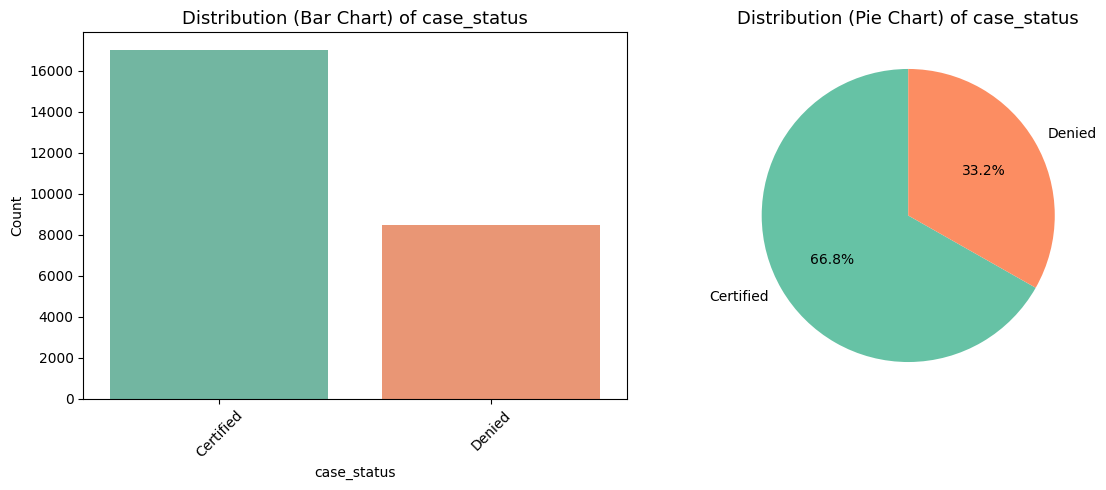

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


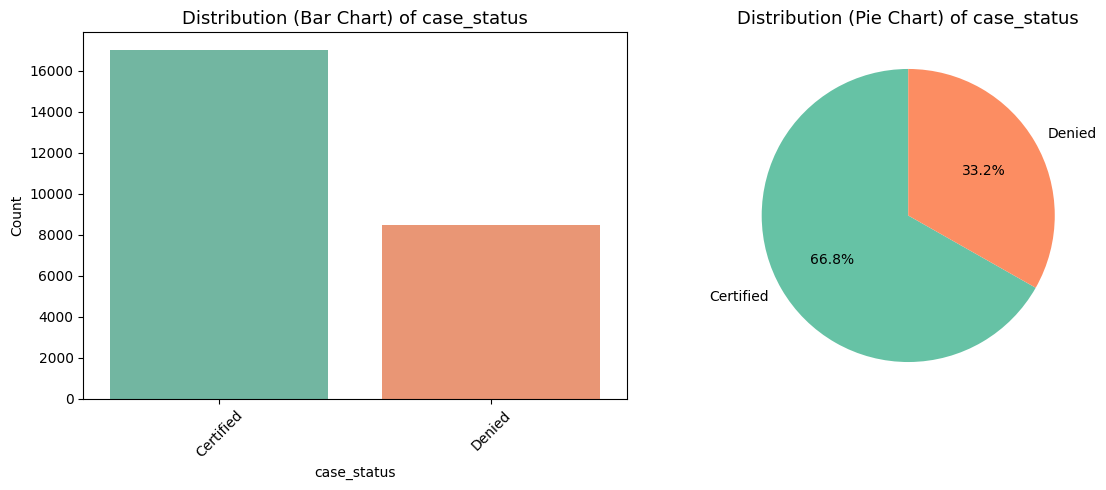

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


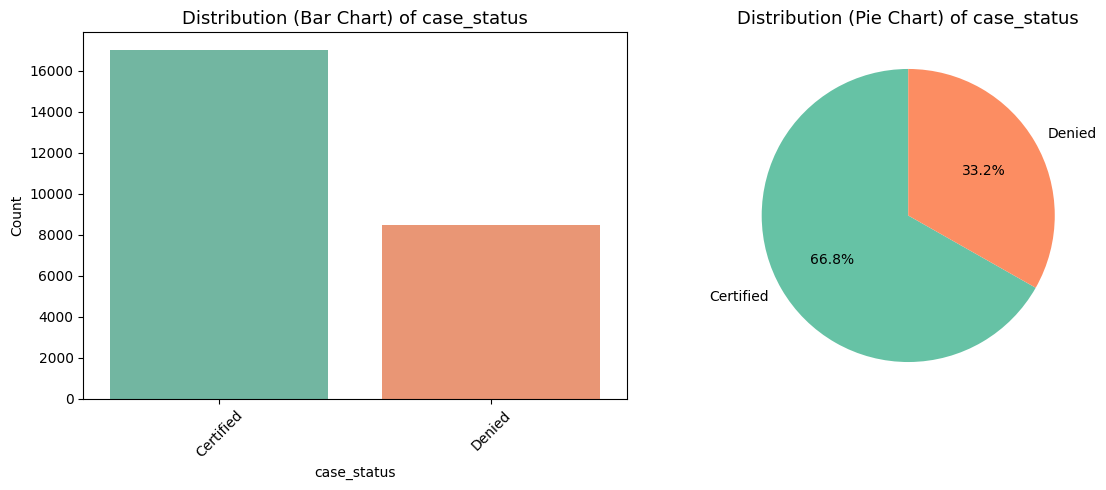

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


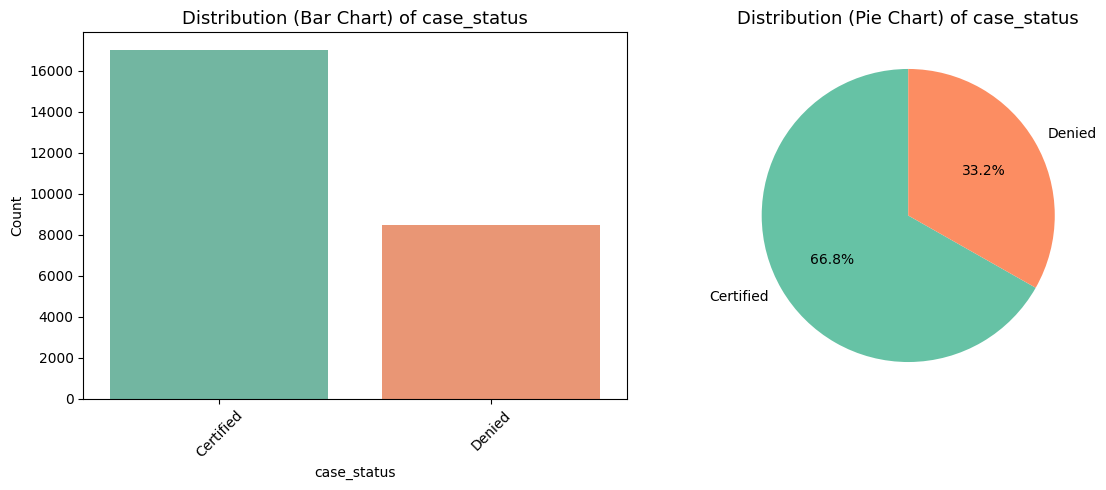

--- case_status Distribution ---

             Counts  Percentage (%)
case_status                        
Certified     17018           66.79
Denied         8462           33.21




C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)


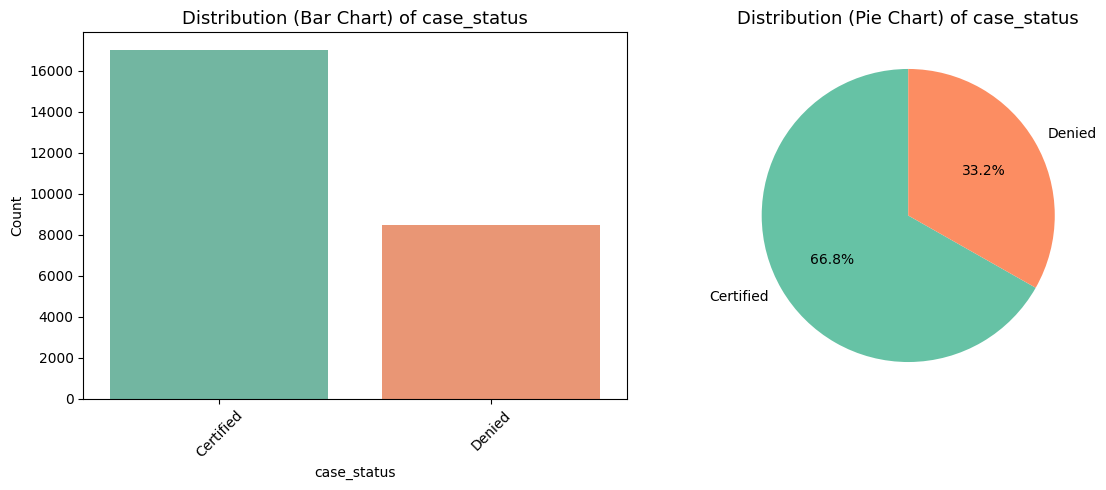

In [13]:
for cols in categorical_columns:
    univariate_categorical_analysis(df, col)

### **Bivariate Analysis**

In [14]:
def bivariate_num_cat(df, feature, target='case_status'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)
    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()
    plt.figure(figsize=(10,5))
    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    # # Violin plot for distribution shape
    # plt.figure(figsize=(10,5))
    # sns.violinplot(x=target, y=feature, data=df, palette='Set3')
    # plt.title(f'{feature} distribution by {target}', fontsize=13)
    # plt.xlabel(target)
    # plt.ylabel(feature)
    # plt.show()


 Feature: no_of_employees vs case_status
                    mean           std   min       max
case_status                                           
Certified    5807.018157  23119.575259 -26.0  602069.0
Denied       5385.538407  22382.755904 -26.0  594472.0



C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\2202711978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


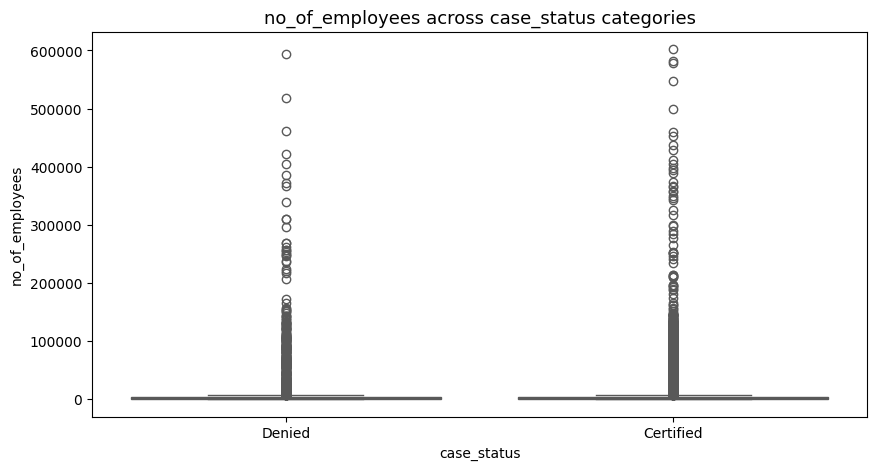

 Feature: yr_of_estab vs case_status
                    mean        std     min     max
case_status                                        
Certified    1979.666765  42.278601  1800.0  2016.0
Denied       1978.893406  42.541819  1800.0  2016.0



C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\2202711978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


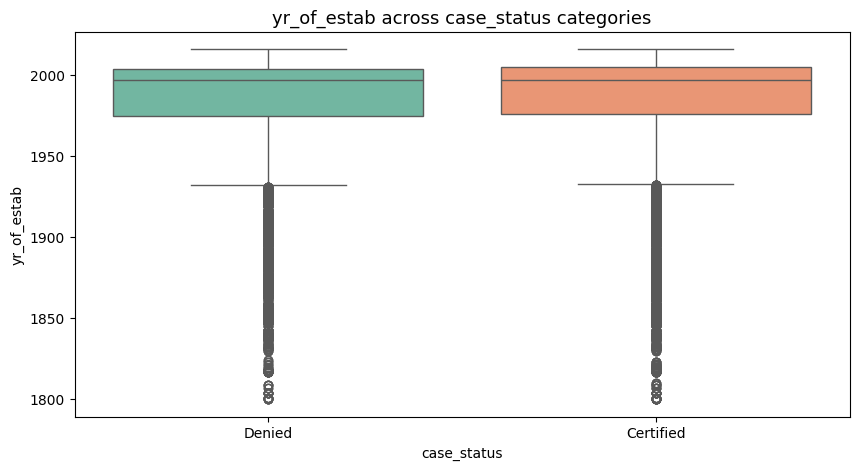

 Feature: prevailing_wage vs case_status
                     mean           std     min        max
case_status                                               
Certified    77293.619243  52042.715576  2.1367  318446.05
Denied       68748.681580  53890.166031  2.9561  319210.27



C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\2202711978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


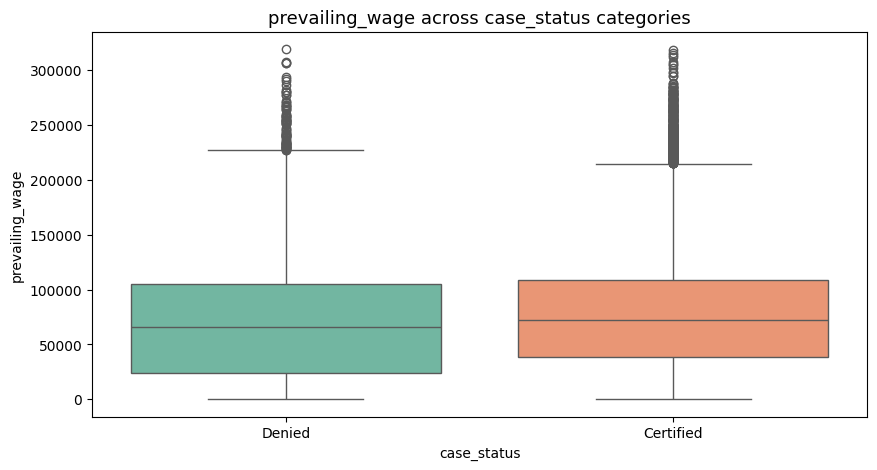

In [15]:
for column in num_col:
    bivariate_num_cat(df,column)

#### **Numeric bivariate analysis**

In [16]:
df_2 = df.copy()

In [17]:
df_2['case_status'].replace({'Certified': 1, 'Denied': 0}, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\3723354025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['case_status'].replace({'Certified': 1, 'Denied': 0}, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\3723354025.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_

In [18]:
df_2['case_status'].value_counts()

case_status
1    17018
0     8462
Name: count, dtype: int64

In [19]:
df_2.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


In [20]:
# 2.2

def correlation_with_target(df_2, target_col, figsize=(10,2)):
    numeric_columns = df_2.select_dtypes(include='number').copy()
    if target_col not in numeric_columns.columns:
        raise ValueError(f"Target column '{target_col}' must be present in the dataframe.")
    corrs = numeric_columns.corrwith(numeric_columns[target_col]).drop(target_col)
    corrs_df = corrs.to_frame(name='corr').T
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}    
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

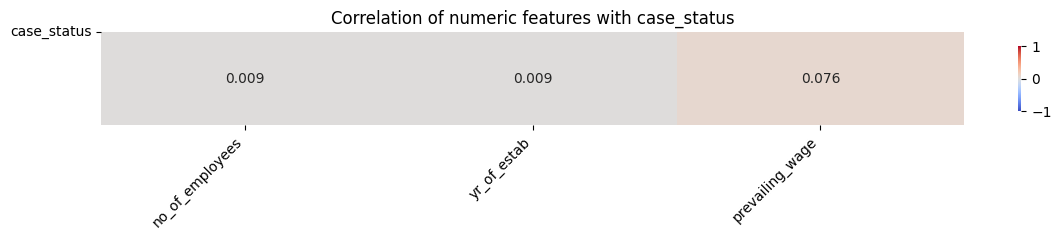

prevailing_wage    0.076198
no_of_employees    0.008677
yr_of_estab        0.008597
dtype: float64


In [21]:
corr_series = correlation_with_target(df_2, 'case_status', figsize=(12,2.5))
print(corr_series)

#### **2.3 Identify and handle outliers in the dataset**

In [22]:
# Outlier treatment based on EDA recommendations
print("=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===")
print("EDA recommended IQR-capping for extreme acidity/sulphates to preserve data points")
# Define numerical columns (excluding target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'quality' in numerical_cols:
    numerical_cols.remove('quality')
print(f"Treating outliers in {len(numerical_cols)} numerical features...")
# Apply IQR-capping method
outliers_capped = 0
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers before capping
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outliers_before > 0:
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        outliers_capped += outliers_before
        print(f"✓ {col}: Capped {outliers_before} outliers")
print(f"\nTotal outliers capped: {outliers_capped}")
print(f"Dataset shape after outlier treatment: {df.shape}")









=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===
EDA recommended IQR-capping for extreme acidity/sulphates to preserve data points
Treating outliers in 3 numerical features...
✓ no_of_employees: Capped 1556 outliers
✓ yr_of_estab: Capped 3260 outliers
✓ prevailing_wage: Capped 427 outliers

Total outliers capped: 5243
Dataset shape after outlier treatment: (25480, 12)


#### **After handling the outliers**

In [23]:
def bivariate_num_cat(df, feature, target='case_status'):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)
    # Group summary
    summary = df.groupby(target)[feature].describe()[['mean','std','min','max']]
    print(summary)
    print()
    plt.figure(figsize=(10,5))
    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette='Set2')
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\332044461.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


 Feature: no_of_employees vs case_status
                    mean          std   min     max
case_status                                        
Certified    2535.646845  1891.578352 -26.0  7227.0
Denied       2413.221461  1837.033400 -26.0  7227.0



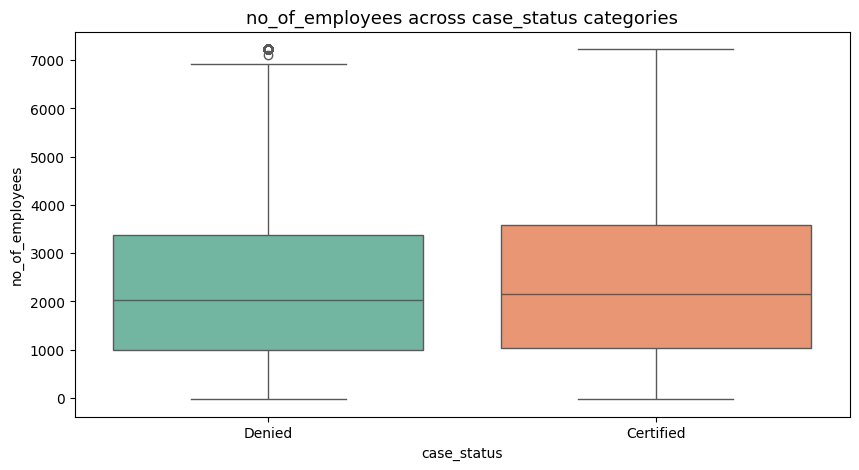

 Feature: yr_of_estab vs case_status
                    mean        std     min     max
case_status                                        
Certified    1986.166676  25.842438  1932.5  2016.0
Denied       1985.535748  25.750675  1932.5  2016.0



C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\332044461.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


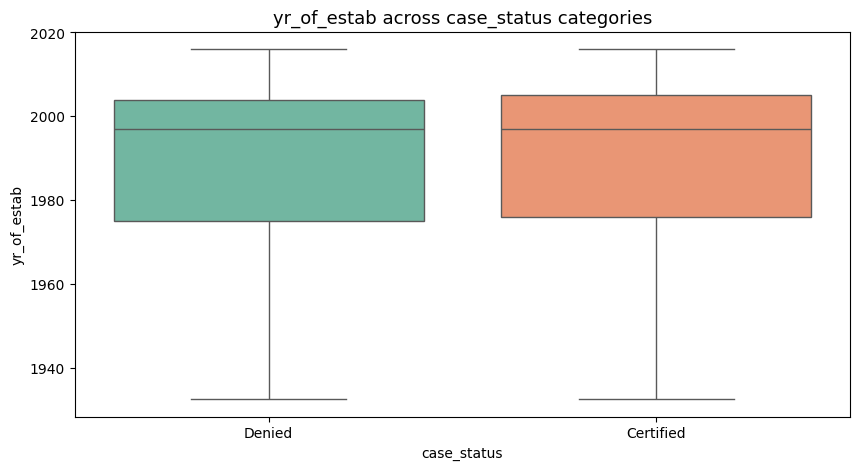

 Feature: prevailing_wage vs case_status
                     mean           std     min           max
case_status                                                  
Certified    76726.924388  50227.461199  2.1367  218315.56125
Denied       68399.575041  52752.691271  2.9561  218315.56125



C:\Users\Dell\AppData\Local\Temp\ipykernel_15300\332044461.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


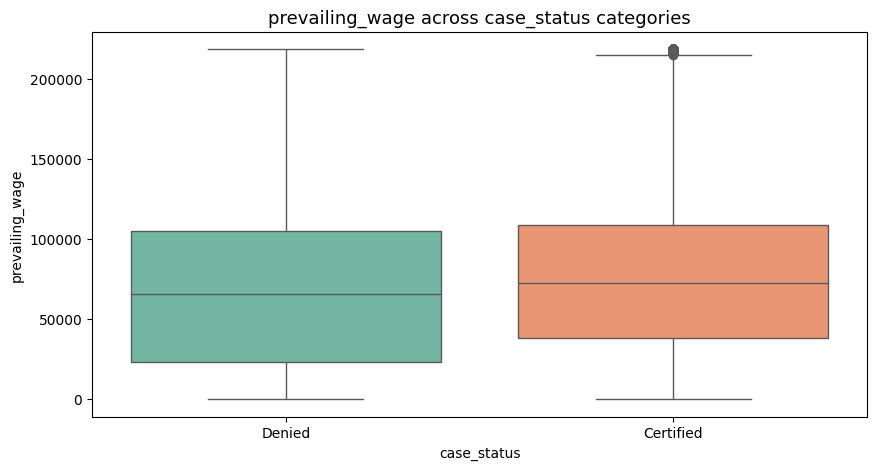

In [24]:
for column in num_col:
    bivariate_num_cat(df,column)

In [25]:
df.to_csv("cleaned_easy_visa_data.csv", index=False)